# Time Series Fundamentals

## Downloading and Inspecting the Bitcoin Historical Data

### Get data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-10-26 09:06:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2021-10-26 09:06:05 (5.51 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



###Importing Time Series Data

In [ ]:
# import with pandas
import pandas as pd

# reading in the Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas that column one is datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# number of samples that we have right now
len(df)

2787

In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


Typically deep learning models have huge amounts of samples where it can go upto thousands to tens of thousands to even millions.

But generally in Time Series Problems, the number of samples is generally low due to seasonality.

>**Note**: The seasonality of a time series dataset is referred to as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year only.

In [ ]:
# only want the closing price for each day
import pandas as pd
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


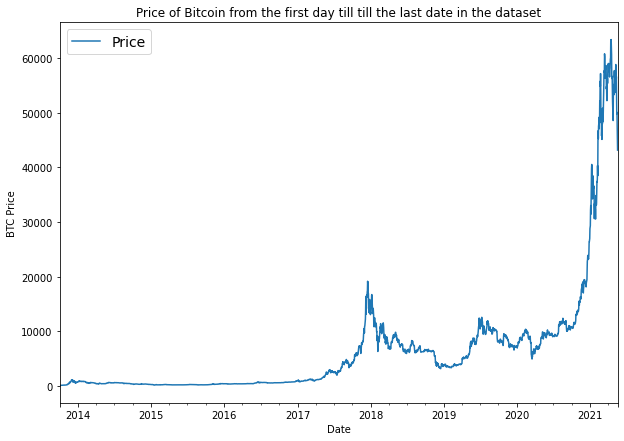

In [ ]:
# visualizing the data
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from the first day till till the last date in the dataset")
plt.legend(fontsize=14)

### Reading the Bitcoin Data using Python's CSV Model

In [ ]:
# importing and formatting historical Bitcoin data with python
import csv
from datetime import datetime

timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #skip the first line (gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates and not strings
    btc_price.append(float(line[2])) # get the closing price as float

# View the first ten of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

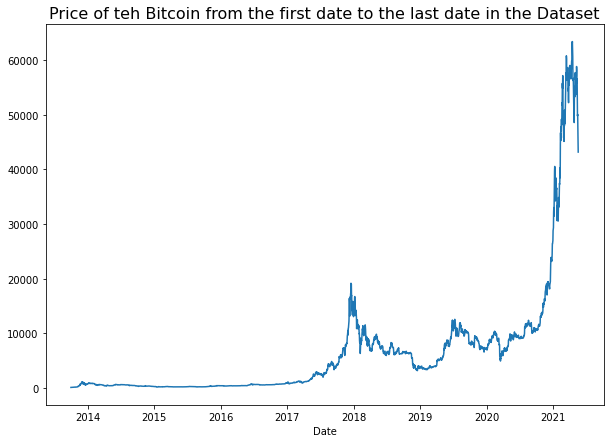

In [ ]:
# plot from csv
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of teh Bitcoin from the first date to the last date in the Dataset", fontsize=16)
plt.xlabel("Date")

# Format Data Part 1: Create train and test sets of our time series data

### Create train and test sets of our time series data (the wrong way)

In [ ]:
# get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# wrong way to make train test sets for the time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, #BTC Prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

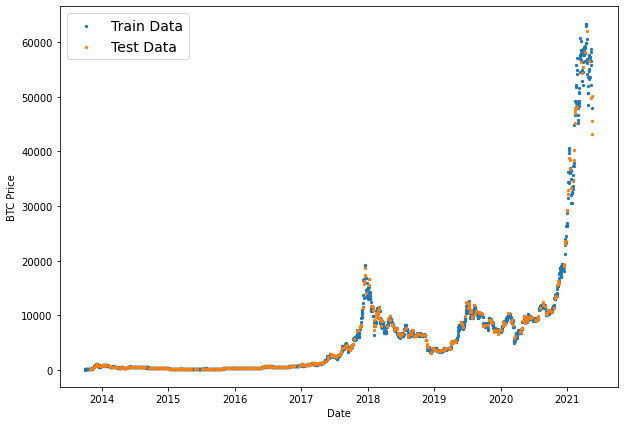

In [ ]:
# plotting the wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Here, we have used the random split to the time series. But actually we have to simulate the future data predictions using the training data. In this case, the training data is riddled with the testing data thus causing a data leakage problem, which basically means that the data from the pseudo future leaks into the past.

### Creating training and testing datasets for time series in the right way

In [ ]:
split_size = int(0.8 * len(prices)) #80% train, 20% test - you can change these values as needed

# create train data split (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data split (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

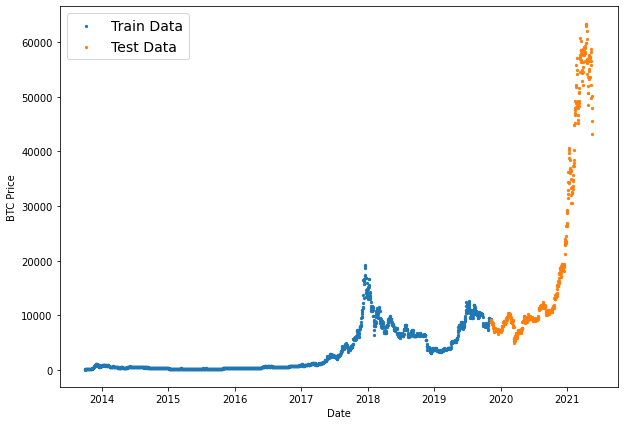

In [ ]:
# plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create a plotting function

In [ ]:
# create a function to plot the times series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against value (a series of values across timesteps)

  Parameters
  --------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label tp show on plot about values
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label :
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

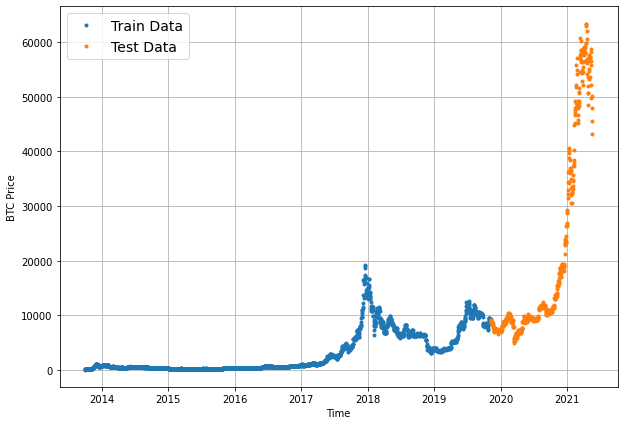

In [ ]:
# test out the plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

## Model 0: Baseline Model (Naive Forecast)

The Formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [ ]:
# create a Naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

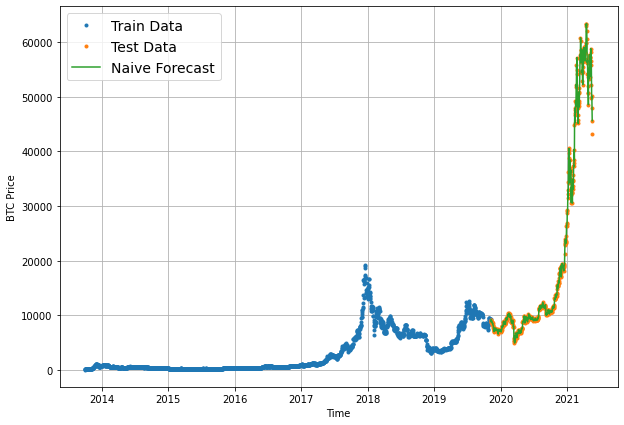

In [ ]:
# plotting the  naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label='Naive Forecast')

### Evaluating the time series model

We're predicting a number, so that means we're dealing with a regression problem, thereofre, we'll need some regression evaluation metrics.

A few common regression metrics that can be used for times series forecasting:
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

The main thing we're evaluating here is how do our models forecast compared against the actual values (y_true or ground truth values)?

Here, in Bitcoin Price Prediction, we're dealing with the non-seasonal time series forecasting. Therefore, we're going to use the non-seasonal version of MASE. The lower the metrics, the better the performannce of the model.

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation in Tensorflow
def mean_absolute_squared_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data.)
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # find the mae of the naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is one day, hence, the shift of one

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_squared_error(y_true=y_test[1:],
     y_pred=naive_forecast).numpy()

0.9995699939182624

## Evaluating the model's forecasts with various metrics

In [ ]:
# defining a function to evaluate the metrics of the model built for time series model

def eva_metrics(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # calculate the various evalutation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_squared_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = eva_metrics(y_true=y_test[1:],
                            y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

# Format Data Part Two : Windowing Our Dataset

Why do we window?
We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week:
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```


In [ ]:
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
# setting up global variables for window and horizon size
HORIZON = 1 # predict the next one day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
# create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g.:
  If horizon=1,
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


## Preprocessing Function to convert time series data into windows and labels

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6]).
2. It will use Numpy indexing to create a 2D array of multiple window steps for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin).
4. Uses our `get_labelled_window()` function we created above to turn the window steps into windows with a specified horizon.

In [ ]:
import numpy as np
# create function to view numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size with horizon size labels.
  """
  # 1. Create a window step of specific window size (add the horizon at the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Use Numpy indexing to create a 2D array of different window_steps
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T # create a 2D array of windows of size window_size
  #print(f"Window indexes: \n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# view the first three windows and labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Labels: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Labels: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Labels: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Labels: [125.96116]


## Turning our windows into training and testing datasets

In [ ]:
# create a function to make train and test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# check to see if the train labels are the same
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a Modelling Checkpoint

Because our model's performance will fluctuate ffrom experiment to experiment, we're going to write a model checkpoint.

More specifically, we want to compare our model's best performance against the other model's best performances.

For example, our model performs best on epoch 55, but we're training for a 100 epochs, we want to load and evaluate the model save don epoch 55.

In [ ]:
import os

# create a function to implement a ModelCheckpoint callback with a  specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbosity=0, # only output a limited amount of text
                                            save_best_only=True)

# Modelling Experiments

## Model 1: Dense Model (window=7, horizon=1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch Size of 128 (previously we've used 32)
* Run for a 100 epochs

All the above parameters are called **hyperparameters**.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear acivation is the same as having noactivation at all
], name="model_1_dense") # name our model so we can save it

# 2. Compile the model
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 17ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
INFO:tensorflow:Assets written to: model_ex

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
# evaluating the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [ ]:
# load in the best performing model_1 and evaluate it on the test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

### Making forecasts with a model on the test dataset

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only pseudo forecasts because actual forecasts are into the future.

In [ ]:
# writing a function to train a model, takes in some input data, passes the input to the model's predict() method and returns the perdictions

def make_preds(model, input_data):
  """
  Uses model to make predictions on the input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # returns a 1D array of predictions

In [ ]:
# make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [ ]:
test_labels[:10], test_labels.shape

(array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102],
        [8656.97092235],
        [8500.64355816],
        [8469.2608989 ],
        [8537.33965197],
        [8205.80636599]]), (556, 1))

In [ ]:
# evaluate preds
model_1_results = eva_metrics(y_true=tf.squeeze(test_labels),
                              y_pred=model_1_preds)
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

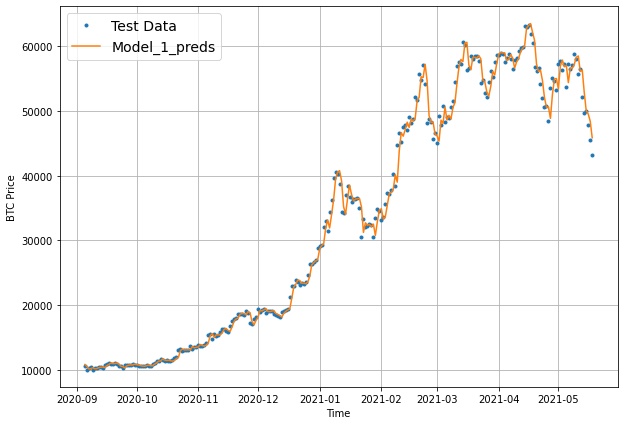

In [ ]:
# let's plot the model 1 predictions
offset=300
plt.figure(figsize=(10, 7))
# account for the test_window offset and index into test_labels too ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="Model_1_preds")

## Model 2: Dense Model with Window Size = 30 and horizon=1

In [ ]:
# making full windows and full labels for model_2
fw_model_2, fl_model_2 = make_windows(prices, window_size=30, horizon=1)

In [ ]:
# splitting the data into training and testing datasets
train_windows_model_2, test_windows_model_2, train_labels_model_2, test_labels_model_2 = make_train_test_splits(fw_model_2, fl_model_2)

In [ ]:
len(train_windows_model_2), len(test_windows_model_2), len(train_labels_model_2), len(test_labels_model_2)

(2205, 552, 2205, 552)

In [ ]:
train_windows_model_2[:5], train_labels_model_2[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
# Building the model
import tensorflow as tf
from tensorflow.keras import layers

# set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear acivation is the same as having noactivation at all
], name="model_2_dense_w30_h1") # name our model so we can save it

# 2. Compile the model
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fit the model
model_2.fit(x=train_windows_model_2,
            y=train_labels_model_2,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows_model_2, test_labels_model_2),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 17ms/step - loss: 1097.0397 - mae: 1097.0397 - mse: 4741506.0000 - val_loss: 3900.2532 - val_mae: 3900.2532 - val_mse: 32752726.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_w30_h1/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.1875 - val_loss: 1587.0747 - val_mae: 1587.0748 - val_mse: 6817664.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_w30_h1/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0938 - val_loss: 1220.6887 - val_mae: 1220.6887 - val_mse: 4447002.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_w30_h1/assets
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1571 - val_mae: 1160.1571 - val_mse: 3837504.5000
INFO:tensorflow:

In [ ]:
# evaluate model2 on test data
model_2.evaluate(test_windows_model_2, test_labels_model_2)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [ ]:
# load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense_w30_h1/")
model_2.evaluate(test_windows_model_2, test_labels_model_2)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [ ]:
# get the forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows_model_2)

In [ ]:
# evaluate results for model_2 predictions
model_2_results = eva_metrics(y_true=tf.squeeze(test_labels_model_2),
                              y_pred=model_2_preds)

In [ ]:
model_2_results

{'mae': 608.9615,
 'mape': 2.7693388,
 'mase': 1.0644706,
 'mse': 1281438.9,
 'rmse': 1132.0066}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

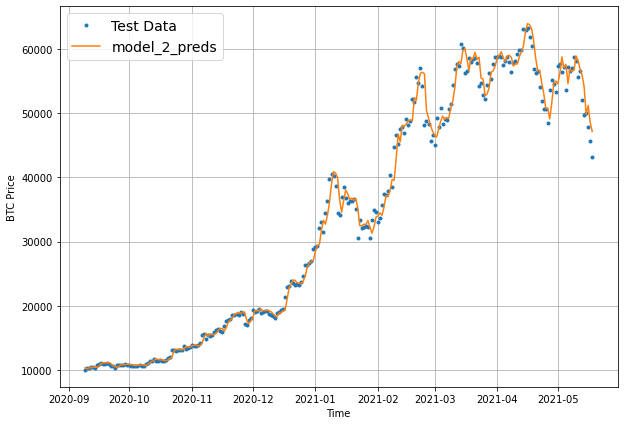

In [ ]:
offset=300
plt.figure(figsize=(10,7))
# Account for the test window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows_model_2):], values=test_labels_model_2[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows_model_2):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense Model (window size = 30, horizon = 7)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=30, horizon=7)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
# making the training and testing datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

In [ ]:
# building the model
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(7, activation='linear')
], name="model_3_dense")

# compile the model
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# fit the model
model_3.fit(train_windows,
            train_labels,
             batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# evaluating the model
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1321.5203


1321.520263671875

In [ ]:
# load the best performing model_3
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [ ]:
# make predictions with model 3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.693 , 9048.1   , 9425.088 , 9258.258 , 9495.798 , 9558.451 ,
        9357.354 ],
       [8735.507 , 8840.304 , 9247.793 , 8885.6   , 9097.188 , 9174.328 ,
        9156.819 ],
       [8672.508 , 8782.388 , 9123.8545, 8770.37  , 9007.13  , 9003.87  ,
        9042.724 ],
       [8874.398 , 8784.737 , 9043.901 , 8943.051 , 9033.479 , 9176.488 ,
        9039.676 ],
       [8825.891 , 8777.4375, 8926.779 , 8870.178 , 9213.232 , 9268.156 ,
        8942.485 ]], dtype=float32)>

In [ ]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [ ]:
# evaluate model_3 results
model_3_results = eva_metrics(y_true=tf.squeeze(test_labels),
                              y_pred=model_3_preds)

In [ ]:
model_3_results

{'mae': array([ 513.60516 ,  355.08356 ,  327.17035 ,  358.50977 ,  420.53207 ,
         537.8539  ,  545.6606  ,  485.92307 ,  584.497   ,  687.3814  ,
         836.22675 ,  755.1572  ,  731.4958  ,  775.3398  ,  567.9548  ,
         266.80865 ,  188.80217 ,  188.1077  ,  253.09521 ,  301.4336  ,
         151.10742 ,  196.81424 ,  191.46184 ,  231.65074 ,  143.6114  ,
         122.59033 ,  132.78844 ,  190.8116  ,  179.1598  ,  228.25941 ,
         314.44022 ,  379.0927  ,  278.3254  ,  295.34604 ,  299.38525 ,
         248.64977 ,  299.7564  ,  259.6937  ,  180.30566 ,  206.72887 ,
         374.62897 ,  144.85135 ,  142.33601 ,  131.1158  ,   93.94057 ,
          54.825542,   73.79423 ,  103.59989 ,  121.3337  ,  168.67223 ,
         183.90945 ,  152.25307 ,  186.57137 ,  146.91309 ,  240.42955 ,
         351.00668 ,  540.9516  ,  549.15674 ,  521.2422  ,  526.8553  ,
         453.36313 ,  257.98166 ,  277.29492 ,  301.82465 ,  455.71756 ,
         458.9599  ,  503.44427 ,  522.3119 

### Adjusting the evaluation function to work for larger horizons

In [ ]:
# defining a function to evaluate the metrics of the model built for time series model

def eva_metrics(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # calculate the various evalutation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_squared_error(y_true, y_pred)

  # Account for different sized metrics for longer horizons
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# get model_3 results aggregated to single results
model_3_results = eva_metrics(y_true=tf.squeeze(test_labels),
                              y_pred=model_3_preds)

In [ ]:
model_3_results

{'mae': 1237.5063,
 'mape': 5.5588784,
 'mase': 2.2020736,
 'mse': 5405198.5,
 'rmse': 1425.7477}

### Visualizing the results

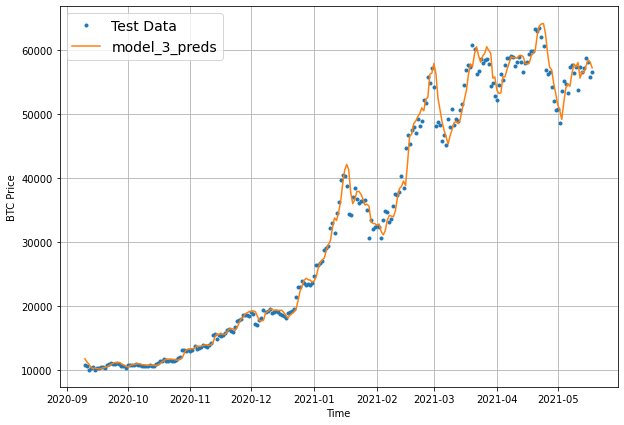

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds")

## Comparing the  models so far

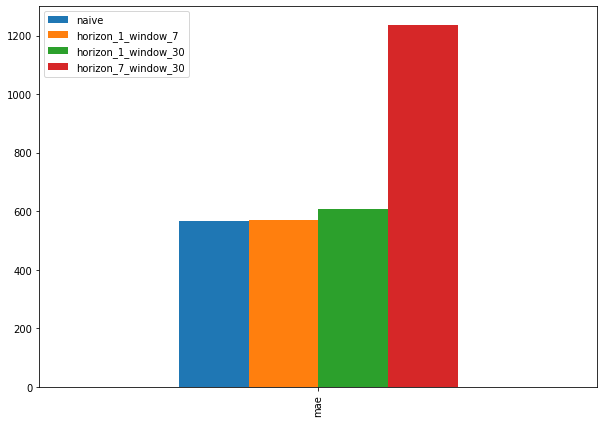

In [ ]:
pd.DataFrame({"naive": naive_results['mae'],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=['mae']).plot(figsize=(10,7), kind='bar');

## Model 4: Conv1D Model

In [ ]:
# create the window dataset
full_windows, full_labels = make_windows(prices, window_size=7, horizon=1)

In [ ]:
# create train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`.........
However, this isn't in the shape yet........

In [ ]:
# check data input shape
train_windows[0].shape

(7,)

In [ ]:
# before we pass our data to the Conv1D layer, we have to reshape it in order to make it work properly
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for the input_data

In [ ]:
# test out the lambda layer
print(f"Original Shape: {x.shape}") # WINDOW_SIZE
print(f"Expanded Shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original Shape: (7,)
Expanded Shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# building the model
from tensorflow.keras import layers
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               layers.Lambda(lambda inputs: tf.expand_dims(inputs, axis=1)),
                               layers.Conv1D(filters=128, strides=1, kernel_size=5, padding='causal', activation='relu'),
                               layers.Dense(1)
], name="model_4_conv1D")

# compile the model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# fitting the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 610.1541


610.154052734375

In [ ]:
# load back in the best performing model
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 570.8284


570.8284301757812

In [ ]:
# make predicstions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.465, 8754.47 , 8983.928, 8759.672, 8703.628, 8708.294,
       8661.668, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [ ]:
# evalluate predictions
model_4_results = eva_metrics(y_true=tf.squeeze(test_labels),
                              y_pred=model_4_preds)
model_4_results

{'mae': 570.8284,
 'mape': 2.5593357,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

## Model 5: LSTM Model

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=7, horizon=1)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
# buidling the model
tf.random.set_seed(42)

inputs = layers.Input(shape=(7))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
#x = layers.Dense(32, activation='relu')
output = layers.Dense(1)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# compiling the model
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

#fitting the model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 2s 22ms/step - loss: 2323.6082 - val_loss: 9222.6523
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 695.4739 - val_loss: 1486.0555
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 237.3967 - val_loss: 1298.9084
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 181.9180 - val_loss: 966.6430
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 173.5414 - val_loss: 941.4746
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 7/100


In [ ]:
# load in the best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 596.6447


596.6446533203125

In [ ]:
# make predictions with the LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8991.225, 8823.2  , 9009.359, 8847.859, 8742.254], dtype=float32)>

In [ ]:
# get the results for the model
model_5_results = eva_metrics(y_true=tf.squeeze(test_labels),
                              y_pred=model_5_preds)
model_5_results

{'mae': 596.64465,
 'mape': 2.6838453,
 'mase': 1.0481395,
 'mse': 1273486.9,
 'rmse': 1128.4888}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

# Building a MultiVariate Time Series Model

Refer to this video for extra details:
>https://www.cmcmarkets.com/en-nz/learn-cryptocurrencies/what-is-bitcoin-cash#:~:text=Block%20size,-One%20of%20the&text=This%20was%20a%20result%20of,to%20process%20transactions%20much%20faster.


In [ ]:
# making a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# create block ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [ ]:
# add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

#  add in the block_reward as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


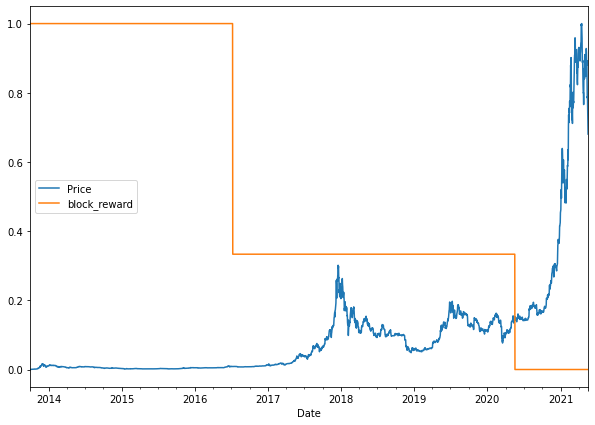

In [ ]:
# plot the block_reward vs price
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                        columns=bitcoin_prices_block.columns,
                                                                        index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with Pandas
Previosuly, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

In [ ]:
# setup dataset  hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# make a copy of the bitcoin historical data with the block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# add the windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


We've created a way to window our dataset directly form a pandas Dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
# create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head(), y.head()

(            block_reward     Price+1  ...     Price+6     Price+7
 Date                                  ...                        
 2013-10-08          25.0  121.794998  ...  125.455002  123.654991
 2013-10-09          25.0  123.032997  ...  108.584831  125.455002
 2013-10-10          25.0  124.049004  ...  118.674660  108.584831
 2013-10-11          25.0  125.961159  ...  121.338661  118.674660
 2013-10-12          25.0  125.279663  ...  120.655327  121.338661
 
 [5 rows x 8 columns], Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.279663
 2013-10-12    125.927498
 Name: Price, dtype: float32)

## Creating the training and testing datasets (using indexing)

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

## Model 6: Dense Model (multivariate time series)

In [ ]:
tf.random.set_seed(42)

# make the multivariate time series model
model_6 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON),

], name="model_6_dense_multivariate")

# compiling the model
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# fitting the model
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 1234.6805 - val_loss: 2061.9080
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 351.5053 - val_loss: 1908.6729
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 235.4153 - val_loss: 1329.0585
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 208.6112 - val_loss: 1102.1340
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 196.5770 - val_loss: 1107.8472
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 187.2244 - val_loss: 1036.1722
INFO:tensorflow:Assets wri

In [ ]:
# evaluate the multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 654.9892


654.9891967773438

In [ ]:
# load in and evaluate the best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.5862


567.5862426757812

In [ ]:
# make some predictions with the multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.276, 8763.8  , 9040.486, 8741.225, 8719.326, 8765.071,
       8661.102, 8496.891, 8463.231, 8521.585], dtype=float32)>

In [ ]:
# evaluate the predictions to get the evaluation metrics
model_6_results = eva_metrics(y_true=y_test,
                              y_pred=model_6_preds)
model_6_results

{'mae': 567.5863,
 'mape': 2.5413754,
 'mase': 0.99709195,
 'mse': 1161687.2,
 'rmse': 1077.816}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Model 7: N-BEATS Algorithm

Check this paper for further insight into the concept: https://arxiv.org/abs/1905.10437

 In this model, we're going to replicate the proposed model in the above mentioned paper.

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in Tensorflow, we've got to create it.

To create custom layers and models in Tensorflow we use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# create N-BEATS custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the parameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # block contains stack of four fully connected layers and each of them has ReLu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]

    # output of the block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each of the hidden layer
      x = layer(x)
    theta = self.theta_layer(x)

    # output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

### Testing the N-BEATS algorithm

To do so, we'll build some dummy inputs and outputs.

In [ ]:
# setting up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# create dummy inputs (have to be same size as the input size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to has to reflect dense layer input requirements (n_dims=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# these are going to be activation outputs of the theta layer (they'll be random due to the no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014978  0.83798355 -0.32870018  0.25159916 -0.47540277 -0.77836645
 -0.5299447 ]
Forecast: -0.7554212808609009


### Preparation of Data for the N-BEATS Block Algorithm with `tf.data`

To make our input data load as fast as possible, we're going to be adhering to the performant data pipeline steps in the `tf.data.guide`:

https://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# make the train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# make our data performant using the tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# combine the labels and features by zipping them together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hyperparameters for the N-BEATS model

The values of the hyperparameters are taken from Table 18 of the NBeats paper

In [ ]:
# values from the N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = (WINDOW_SIZE * HORIZON)
THETA_SIZE = INPUT_SIZE + HORIZON

### Getting ready for the residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections.

The N-BEATS algorithm uses double residual stacking to help train it's deeper architecture.

In [ ]:
# make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# add
added = layers.add([tensor_1, tensor_2])

# print the results
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS model

1. Setting up an instance of the NBEATS Layer using the `NBeatBlock` (this will be the initial block for the network, the rest will be created as part of stacks)
2. Create an input layer for the NBEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model wihtth the model created in (1).
4. Use for loop to create stacks of block layers
5. We will use the N-BEATS block class within hte for loop in (4) to create blocks which return backcasts and block-level forecasts.
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together using the tf.keras.Model()
8. Compile the model with MAE loss ( the paper uses multiple losses but we'll keep MAE to keep it inline with the other models) and ADAM optimizer with default setting as per section 5.2 of the N-BEATS paper
9. Fitting the N-BEATS model for 5000 epochs and since it's fitting for too long, we'll stop it early using a couple of callbacks:
 * Early Stopping - because the model will be training for so many epochs, we'll sotp it early if it stops improving
 * Reduce the LR on Plateau - if our model stops improving, try lowering the learning rates to reduce the amount it updates it's weights each time (take smaller steps towards best performance)

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup the instance of the NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create an input layer for the NBeatsStack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards_prediction + horizon_prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in 3.

  # 5. use the nbeats block to calculate the backcast and the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"Subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"Add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_nbeats")

# 8. Compile the model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fitting the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                       patience=200,
                                                       restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 patience=100,
                                                 verbose=1)])


Epoch 00641: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 01084: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 01184: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 35s, sys: 13 s, total: 3min 48s
Wall time: 9min 11s


In [ ]:
# evaluation of the N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 42ms/step - loss: 572.2792


572.2792358398438

In [ ]:
# make predictions with the N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8834.991, 8778.008, 9023.829, 8755.141, 8754.521, 8736.348,
       8653.82 , 8504.352, 8466.935, 8509.674], dtype=float32)>

In [ ]:
# evaluate the N-BEATS model preds
model_7_results = eva_metrics(y_true=y_test,
                              y_pred=model_7_preds)
model_7_results

{'mae': 572.27924,
 'mape': 2.5934565,
 'mase': 1.0053362,
 'mse': 1165763.0,
 'rmse': 1079.7051}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

### Plotting the N-BEATS algorithm

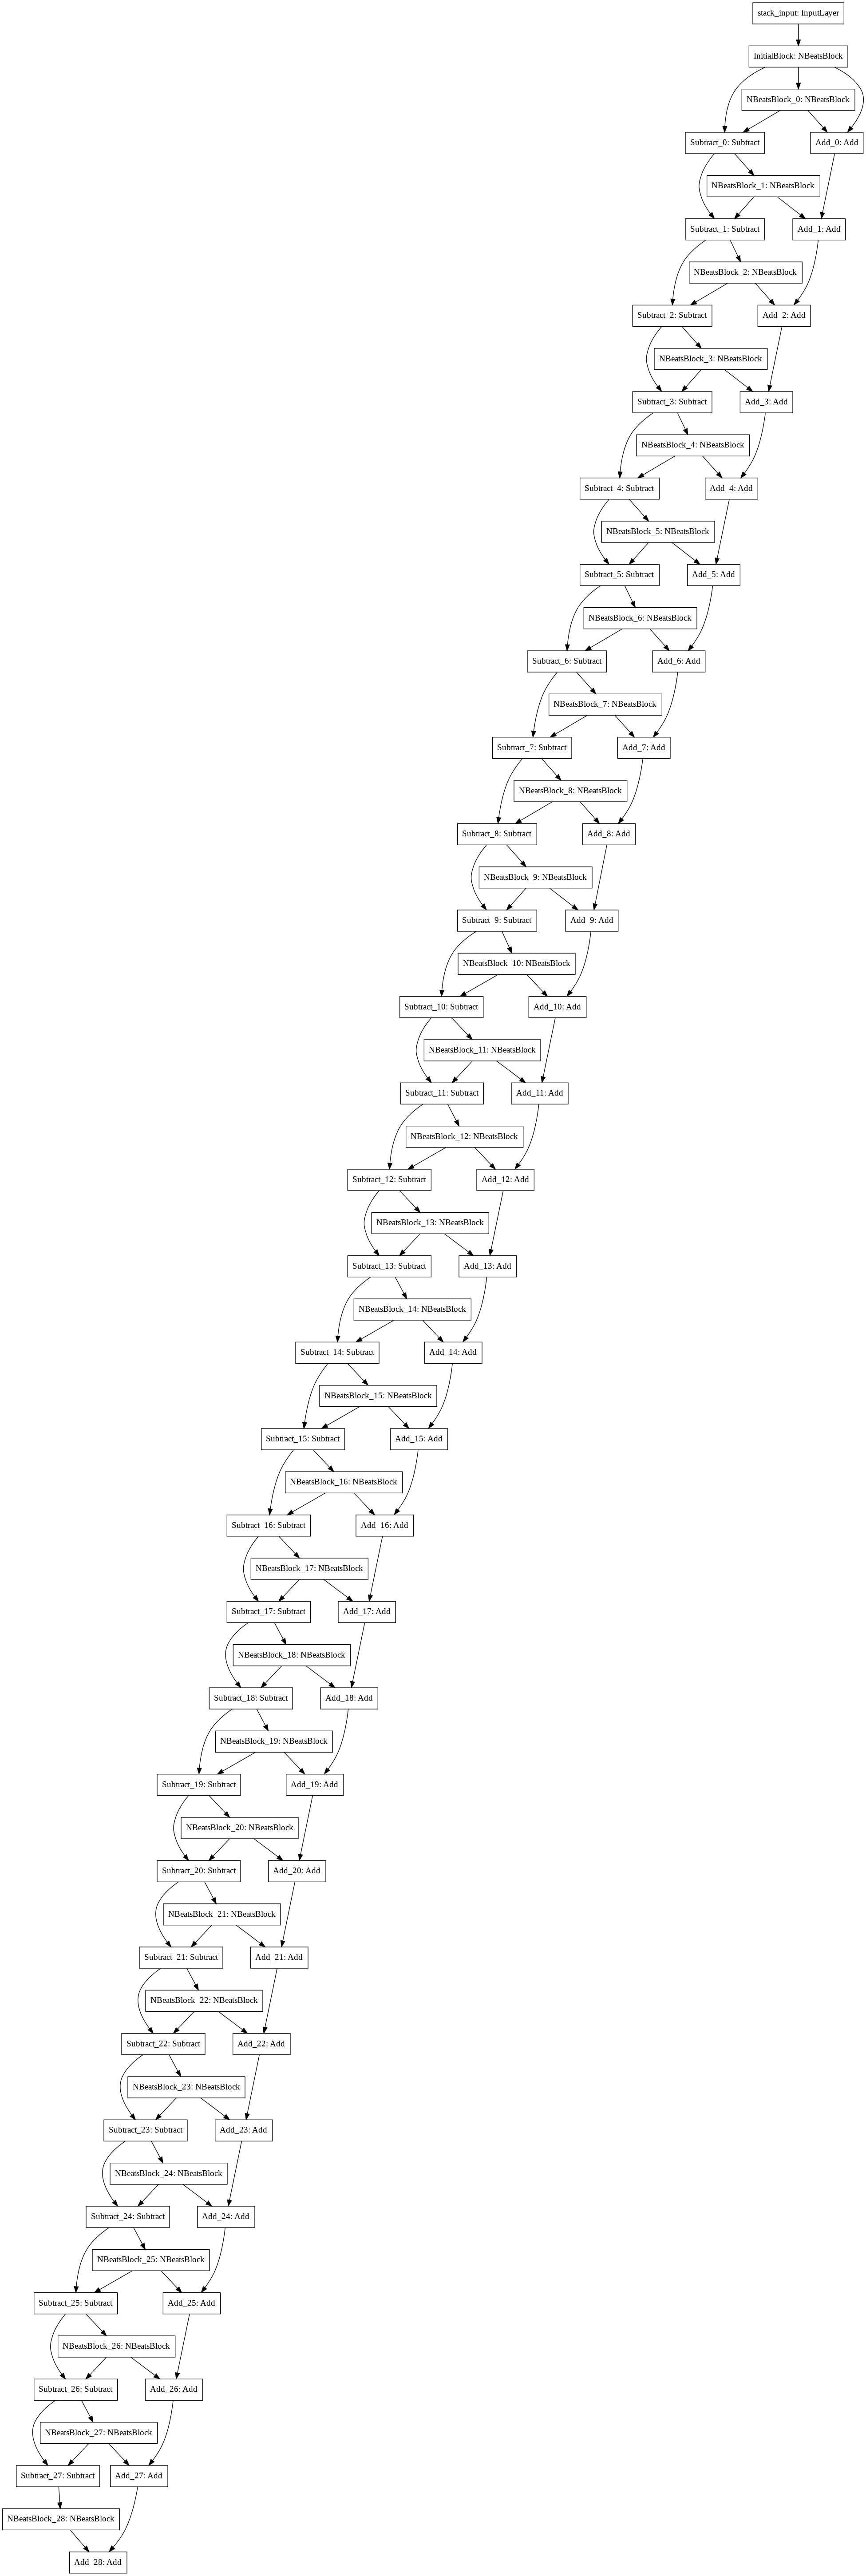

In [ ]:
# plotting the nbeats modeland inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Ensemble Model

## Model 8: Creating an ensemble (stacking different models together)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

### Constructing and fitting the ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_func=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"])
  """
  # make empty list for trained ensemble models
  ensemble_models = []

  # create num_iter number of models per loss function
  for i in range(num_iter):
    # build and fit a new model with a different loss function
    for loss_function in loss_func:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # construct a simple model
      model = tf.keras.Sequential([
                                   # initialize dense layers with normal distribution for establishing prediction intervals later on
                                   layers.Dense(128, kernel_initializer="he_normal", activation="relu"), # the kernel initializer tells the dense layer
                                                                                                         # what type of pattern to initialize with
                                   layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                                   layers.Dense(HORIZON)
      ])

      # compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

    # append fitted model to list of ensemble models
    ensemble_models.append(model)
  return ensemble_models

In [ ]:
%%time
# get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00682: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00942: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00583: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00363: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00463: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizi

### Making and evaluating predictions on the ensemble models

In [ ]:
len(ensemble_models)

5

In [ ]:
ensemble_models

In [ ]:
!nvidia-smi

Tue Oct 26 09:30:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    59W / 149W |   1281MiB / 11441MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds =  []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 231 ms, sys: 21.1 ms, total: 252 ms
Wall time: 245 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(5, 556), dtype=float32, numpy=
array([[ 8732.57 ,  8719.407,  9093.386, ..., 49921.9  , 47992.15 ,
        45316.45 ],
       [ 8796.804,  8763.816,  9022.93 , ..., 49853.44 , 48444.477,
        45901.34 ],
       [ 8808.998,  8790.83 ,  9104.094, ..., 50180.582, 48242.18 ,
        45419.652],
       [ 8802.095,  8768.07 ,  9054.704, ..., 49502.305, 48333.688,
        45454.79 ],
       [ 8817.077,  8761.286,  9040.391, ..., 49725.223, 48059.434,
        45821.742]], dtype=float32)>

Our ensemble_preds come out in multiple dimensions but to combine them into **point predictions** we can leverage the mean of all the predictions or the median.

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8791.51  ,  8760.682 ,  9063.101 ,  8720.841 ,  8746.454 ,
        8743.182 ,  8654.057 ,  8489.088 ,  8463.112 ,  8528.81  ,
        8206.439 ,  8099.7217,  8048.947 ,  7615.167 ,  7264.104 ,
        7281.5283,  7050.6235,  7183.185 ,  7134.7603,  7532.372 ,
        7400.7437,  7745.3506,  7578.409 ,  7394.716 ,  7330.358 ,
        7303.6523,  7205.702 ,  7393.458 ,  7526.475 ,  7548.346 ,
        7568.5586,  7342.862 ,  7230.8267,  7179.3516,  7178.6084,
        7231.841 ,  7093.0454,  7108.3906,  6877.8525,  6579.091 ,
        7408.2954,  7182.8687,  7172.667 ,  7290.325 ,  7268.651 ,
        7219.872 ,  7237.444 ,  7221.9873,  7186.0444,  7229.5654,
        7321.542 ,  7398.8525,  7262.7446,  7177.5625,  7170.5625,
        6945.6064,  7279.3984,  7352.747 ,  7361.0015,  7735.7295,
        8065.8877,  8138.3647,  7859.448 ,  8103.2905,  8121.064 ,
        8176.3135,  8128.6953,  8743.34  ,  8907.889 ,  8775.636 ,
        8961.6

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8802.095, 8763.816, 9054.704, 8716.379, 8751.856, 8740.686,
       8656.227, 8490.431, 8456.717, 8525.501], dtype=float32)

In [ ]:
# evaluate the ensemble model predictions
ensemble_results = eva_metrics(y_true=y_test,
                                y_pred=ensemble_preds)

ensemble_results

{'mae': 571.33264,
 'mape': 2.6055913,
 'mase': 1.0036733,
 'mse': 1152033.9,
 'rmse': 1073.2876}

In [ ]:
# evaluate the ensemble model predictions
ensemble_results = eva_metrics(y_true=y_test,
                                y_pred=ensemble_mean)

ensemble_results

{'mae': 564.9663,
 'mape': 2.570116,
 'mase': 0.99248934,
 'mse': 1134330.9,
 'rmse': 1065.0497}

In [ ]:
# evaluate the ensemble model predictions
ensemble_results = eva_metrics(y_true=y_test,
                                y_pred=ensemble_median)

ensemble_results

{'mae': 566.0911,
 'mape': 2.5727658,
 'mase': 0.9944653,
 'mse': 1137935.4,
 'rmse': 1066.7405}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

### Plotting the ensemble prediction uncertainity intervals
So far, point predictions are being made with our models.

Therefore, a better method would be predicting the range of the point preedictions where it came from.

For example, horizon=1 predicts tomorrow's Bitcoin price = 50,000 USD. Instead of that, how about we use the range 48,000 - 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of ranndomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution of our data is Gaussian/Normal, 95% of the observations fall within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take teh predictions from a number of randomly initialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by  1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


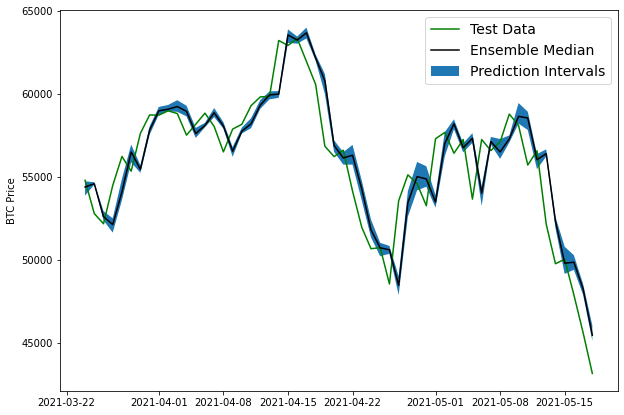

In [ ]:
# get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# plot the median of our ensemble preds with the prediction intervals
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.ylabel("BTC Price")

# to plot the upper and lower bounds, let's use fil_between method
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")

plt.legend(loc="upper_left", fontsize=14);

So far, the model's predictions have been lagging behind the test dataset.

As in, they're replicating what the naive model is doing and just predict the previous timestep as the next timestep

# Future Prediction Models

## Model 9: Train a model on the fu histroical data to make predictions into the future

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# train model on entire data to make predictions on the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()

# get the labels
y_all = bitcoin_prices_windowed.dropna()["Price"]

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:10], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866],
        [125.9275 , 125.27966, 125.96116, 124.049  , 123.033  , 121.795  ,
         120.65533],
        [126.38333, 125.9275 , 125.27966, 125.96116, 124.049  , 123.033  ,
         121.795  ],
        [135.24199, 126.38333, 125.9275 , 125.27966, 125.96116, 124.049  ,
         123.033  ],
        [133.20333, 135.24199, 126.38333, 125.9275 , 125.27966, 125.96116,
         124.049  ],
        [142.76333, 133.20333, 135.24199, 126.38333, 125.9275 , 125.27966,
         125.96116]]), Date
 2013-10-08    123.03300
 2013-10

In [ ]:
# turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# combine the features and labels into a single dataset
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
# build a model to predict into the future

tf.random.set_seed(42)

# create a model
model_9 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON)
], name="model_9_future_prediction")

# compile the model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# fit the model on all of the data to make the future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [ ]:
# making the predictions in to the future and finding out the number of time steps required to predict intot the future
INTO_FUTURE = 14

### Creating a function to make predictions into the future

In [ ]:
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # create am empty list
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(INTO_FUTURE):
    # predict on the last window and then append it again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Predicition: {tf.squeeze(future_pred).numpy()}\n")

    # append predictions to future forecsast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # update the last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on:
 Date
2021-05-12    56573.555472
2021-05-13    52147.821187
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, dtype: float64 -> Predicition: 55764.46484375

Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Predicition: 50985.9453125

Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Predicition: 48522.96484375

Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96484375] -> Predicition: 48137.203125

Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96484375 48137.203125  ] -> Predicition: 47880.63671875

Predicting on:
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96484375 48137.203125   47

### Plotting future forecasts

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start_date, where "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D")

  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date range

In [ ]:
# last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
type(last_timestep)

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)

next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# insert last timestep/final price into next timesteps and future forecasts so that the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.465, 50985.945, 48522.965, 48137.203, 47880.637,
        46879.72 , 48227.6  , 53963.69 , 49685.56 , 47596.176, 48114.43 ,
        48808.008, 48623.855, 50178.723], dtype=float32))

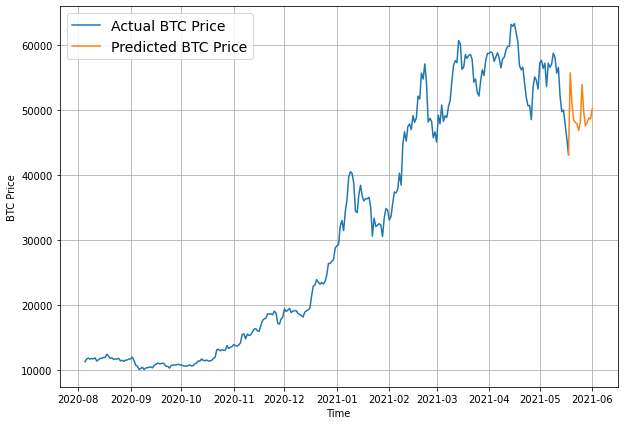

In [ ]:
# plot future price predictions of Bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,
                 btc_price,
                 start=2500,
                 format="-",
                 label="Actual BTC Price")
plot_time_series(next_time_steps,
                 future_forecast,
                 format="-",
                 label="Predicted BTC Price")

## Introduction to Turkey Data

In [ ]:
# let's introduce a turkey problem to the BTC data
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# manufacture an extra price on the end
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# get the timesteps for the BTC problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

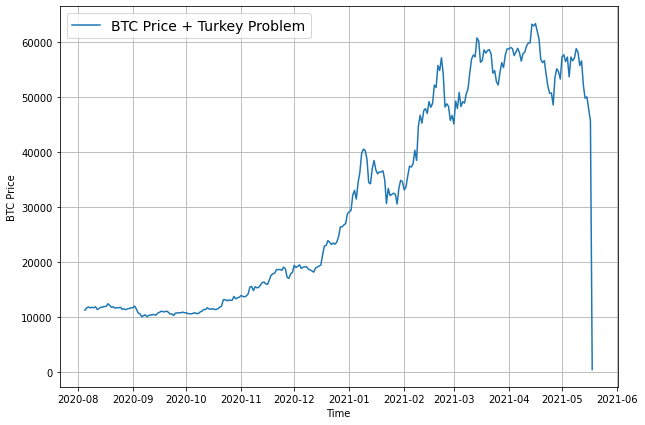

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
# create train and test sets for the turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

In [ ]:
# clone the model 1 architecture for the turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.model.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())

# fitting the turkey model
turkey_model.fit(X_train,
                 y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# evaluate model on test data
turkey_model.evaluate(X_test, y_test)

In [ ]:
# load the best performing turkey model and evaluate on the test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

In [ ]:
# make predictions with the turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

In [ ]:
# evaluate the turkey preds
turkey_results = eva_metrics(y_true=y_test,
                             y_preds=turkey_preds)
turkey_results

In [ ]:
model_1_results

In [ ]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test)],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);